##  US Accidents Exploratory Data Analysis


This is a countrywide car accident dataset, which covers 49 states of the USA. The accident data are collected from February 2016 to Dec 2021, using multiple APIs that provide streaming traffic incident data.

In [1]:
!pip install opendatasets --upgrade --quiet

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [3]:
import opendatasets as od
download_url = 'https://www.kaggle.com/sobhanmoosavi/us-accidents'
od.download(download_url)

data_filename = './us-accidents/US_Accidents_March23.csv'

Skipping, found downloaded files in ".\us-accidents" (use force=True to force download)


In [4]:
df = pd.read_csv(data_filename)

In [5]:
df = df.sample(int(0.1 * len(df)))

In [6]:
df.head(5)

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
2089498,A-2099361,Source2,2,2019-05-13 09:50:15,2019-05-13 11:19:37,34.174900,-86.843773,NaN,NaN,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
6449674,A-6497289,Source1,2,2021-01-20 19:31:40,2021-01-20 22:35:36,33.775513,-78.983426,33.775333,-78.983266,0.015,...,False,False,False,False,True,False,Night,Night,Night,Night
6605415,A-6653907,Source1,2,2020-11-20 19:32:00,2020-11-20 20:52:01,39.828780,-84.198394,39.829007,-84.198400,0.016,...,False,False,False,False,True,False,Night,Night,Night,Night
2567857,A-2577729,Source2,3,2018-09-11 07:44:06,2018-09-11 08:15:00,39.868027,-104.987701,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2746222,A-2756097,Source2,2,2018-06-12 04:04:47,2018-06-12 04:34:35,39.776054,-84.183006,NaN,NaN,0.000,...,False,False,False,False,True,False,Night,Night,Night,Night


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 772839 entries, 2089498 to 995797
Data columns (total 46 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     772839 non-null  object 
 1   Source                 772839 non-null  object 
 2   Severity               772839 non-null  int64  
 3   Start_Time             772839 non-null  object 
 4   End_Time               772839 non-null  object 
 5   Start_Lat              772839 non-null  float64
 6   Start_Lng              772839 non-null  float64
 7   End_Lat                432847 non-null  float64
 8   End_Lng                432847 non-null  float64
 9   Distance(mi)           772839 non-null  float64
 10  Description            772838 non-null  object 
 11  Street                 771778 non-null  object 
 12  City                   772817 non-null  object 
 13  County                 772839 non-null  object 
 14  State                  772839 

In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,772839.000000,772839.000000,772839.000000,432847.000000,432847.000000,772839.000000,756577.000000,572916.000000,755528.000000,758927.000000,755226.000000,715950.000000,552809.000000
mean,2.212117,36.202520,-94.744145,36.267604,-95.783589,0.561944,61.663962,58.237258,64.825701,29.537797,9.086190,7.677471,0.008381
std,0.487252,5.081813,17.401972,5.276728,18.126461,1.768162,19.007922,22.391098,22.843406,1.006585,2.677697,5.375822,0.101519
min,1.000000,24.567459,-124.534439,24.570107,-124.543727,0.000000,-89.000000,-89.000000,1.000000,0.300000,0.000000,0.000000,0.000000
25%,2.000000,33.399911,-117.234859,33.462349,-117.790650,0.000000,49.000000,43.000000,48.000000,29.370000,10.000000,4.600000,0.000000
50%,2.000000,35.823250,-87.827522,36.177542,-88.057530,0.030000,64.000000,62.000000,67.000000,29.860000,10.000000,7.000000,0.000000
75%,2.000000,40.083965,-80.361390,40.178815,-80.250191,0.466000,76.000000,75.000000,84.000000,30.030000,10.000000,10.400000,0.000000
max,4.000000,49.000560,-67.606864,48.996287,-67.626576,194.729996,143.600000,140.000000,100.000000,58.630000,105.000000,812.000000,10.140000


In [14]:
#Percentage of missing values per column
missing_percentages = df.isna().sum().sort_values(ascending=False) / len(df)
missing_percentages

End_Lat                  0.441106
End_Lng                  0.441106
Precipitation(in)        0.284396
Wind_Chill(F)            0.258660
Wind_Speed(mph)          0.073263
Visibility(mi)           0.023317
Weather_Condition        0.023097
Wind_Direction           0.023071
Humidity(%)              0.022942
Temperature(F)           0.021661
Pressure(in)             0.018335
Weather_Timestamp        0.015941
Nautical_Twilight        0.003041
Civil_Twilight           0.003041
Sunrise_Sunset           0.003041
Astronomical_Twilight    0.003041
Airport_Code             0.002821
Street                   0.001436
Timezone                 0.001022
Zipcode                  0.000207
City                     0.000039
Traffic_Signal           0.000000
Roundabout               0.000000
Station                  0.000000
Stop                     0.000000
Traffic_Calming          0.000000
Country                  0.000000
Turning_Loop             0.000000
No_Exit                  0.000000
End_Time      

In [15]:
missing_percentages[missing_percentages != 0]

End_Lat                  0.441106
End_Lng                  0.441106
Precipitation(in)        0.284396
Wind_Chill(F)            0.258660
Wind_Speed(mph)          0.073263
Visibility(mi)           0.023317
Weather_Condition        0.023097
Wind_Direction           0.023071
Humidity(%)              0.022942
Temperature(F)           0.021661
Pressure(in)             0.018335
Weather_Timestamp        0.015941
Nautical_Twilight        0.003041
Civil_Twilight           0.003041
Sunrise_Sunset           0.003041
Astronomical_Twilight    0.003041
Airport_Code             0.002821
Street                   0.001436
Timezone                 0.001022
Zipcode                  0.000207
City                     0.000039
dtype: float64

<AxesSubplot:>

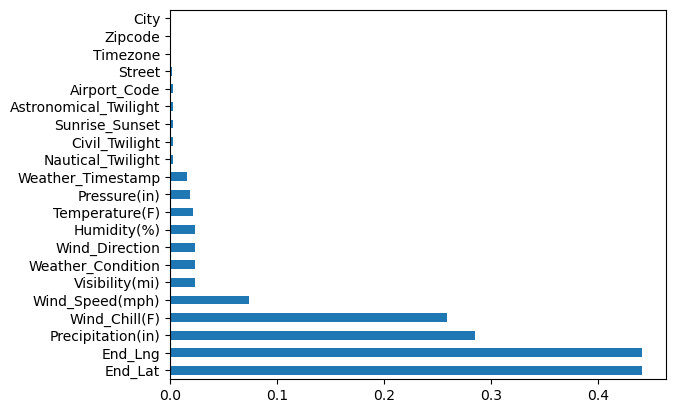

In [16]:
missing_percentages[missing_percentages != 0].plot(kind='barh')

In [17]:
df = df.drop(columns = ['End_Lat', 'End_Lng', 'Precipitation(in)', 'Wind_Chill(F)','Wind_Speed(mph)'])

## Exploratory Analysis and Visualization
Columns analyzed:

State, City
Start Time
Start Lat, Start Lng
Weather Condition

## Start Latitude & Longitude

In [102]:
!pip install folium
import folium

from folium.plugins import HeatMap

In [108]:
df.Start_Lat
df.Start_Lng

sns.scatterplot(x= df.Start_Lng, y=df.Start_Lat, size=0.001)

for x in df[['Start_Lat', 'Start_Lng']].sample(100).iteritems():
    print(x[1])
    
zip(list(df.Start_Lat), list(df.Start_Lng))

from folium.plugins import HeatMap

lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

In [115]:
df.Start_Lat

139745     27.441093
3485460    40.645420
595046     42.760456
306942     29.719738
1191222    29.730717
             ...    
5869999    38.900195
5696426    41.793038
6698122    25.889368
7685615    41.769729
7184421    37.742190
Name: Start_Lat, Length: 77283, dtype: float64

In [116]:
df.Start_Lng

139745     -82.459206
3485460    -74.203037
595046     -84.509201
306942     -95.301353
1191222    -95.413300
              ...    
5869999    -77.039448
5696426    -87.908010
6698122    -80.206795
7685615    -86.088430
7184421   -121.525634
Name: Start_Lng, Length: 77283, dtype: float64

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

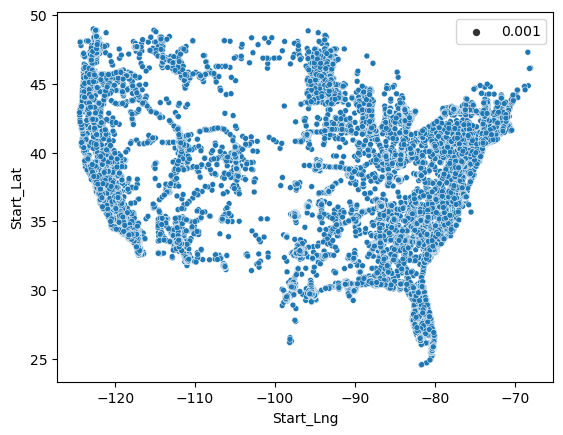

In [117]:
sns.scatterplot(x= df.Start_Lng, y=df.Start_Lat, size=0.001)

In [118]:
for x in df[['Start_Lat', 'Start_Lng']].iteritems():
    print(x[1])

139745     27.441093
3485460    40.645420
595046     42.760456
306942     29.719738
1191222    29.730717
             ...    
5869999    38.900195
5696426    41.793038
6698122    25.889368
7685615    41.769729
7184421    37.742190
Name: Start_Lat, Length: 77283, dtype: float64
139745     -82.459206
3485460    -74.203037
595046     -84.509201
306942     -95.301353
1191222    -95.413300
              ...    
5869999    -77.039448
5696426    -87.908010
6698122    -80.206795
7685615    -86.088430
7184421   -121.525634
Name: Start_Lng, Length: 77283, dtype: float64


In [119]:
zip(list(df.Start_Lat), list(df.Start_Lng))


In [120]:
from folium.plugins import HeatMap

lat_lon_pairs = list(zip(list(sample_df.Start_Lat), list(sample_df.Start_Lng)))

In [121]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Location

In [112]:
state_counts = df["State"].value_counts()
fig = go.Figure(data=go.Choropleth(locations=state_counts.index, z=state_counts.values.astype(float), locationmode="USA-states", colorscale="turbo"))
fig.update_layout(title_text="Number of Accidents for each State", geo_scope="usa")
fig.show()

In [20]:
state_wise = df.groupby(['State']).size().reset_index(name='accident_count')
state_wise

,State,accident_count
0,AL,1058
1,AR,228
2,AZ,1749
3,CA,17460
4,CO,878
5,CT,742
6,DC,159
7,DE,125
8,FL,8777
9,GA,1629


In [21]:
print("State Code: ", df.State.unique())
print("Total No. of State in Dataset: ", len(df.State.unique()))

State Code:  ['FL' 'NJ' 'MI' 'TX' 'CA' 'GA' 'SC' 'MO' 'OH' 'AZ' 'MA' 'NC' 'NY' 'OR'
 'PA' 'TN' 'VA' 'MN' 'MD' 'OK' 'KS' 'NE' 'UT' 'AL' 'AR' 'CT' 'IA' 'IL'
 'WA' 'IN' 'CO' 'WI' 'WV' 'LA' 'KY' 'NH' 'NV' 'DC' 'MT' 'RI' 'MS' 'NM'
 'ME' 'ID' 'DE' 'WY' 'ND' 'VT' 'SD']
Total No. of State in Dataset:  49


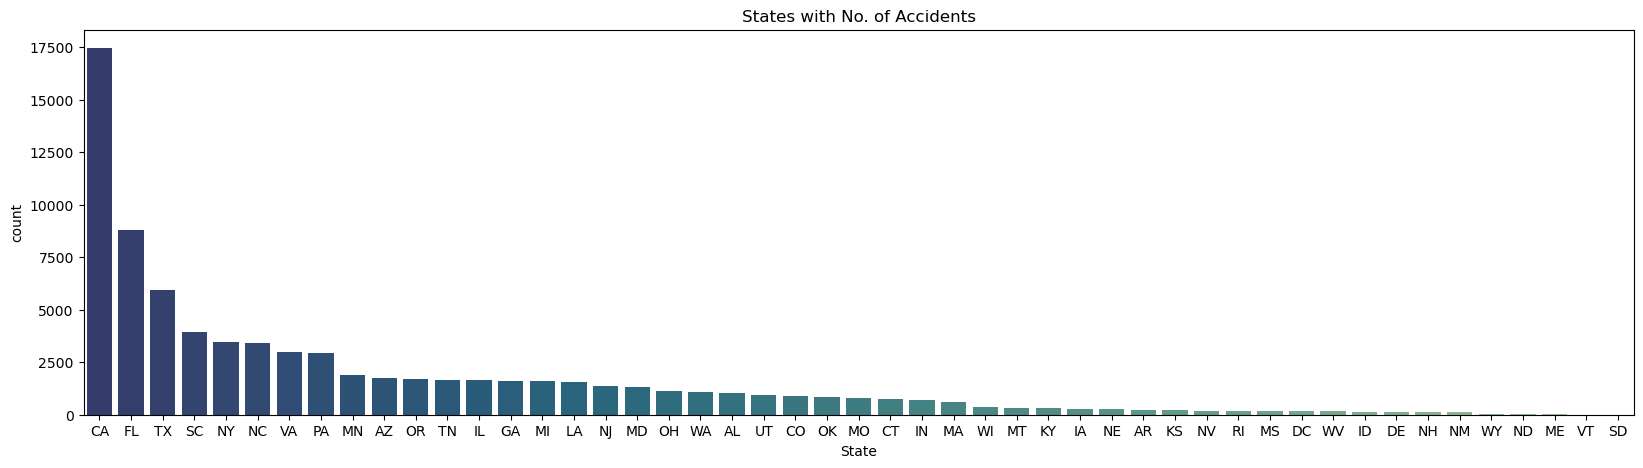

In [25]:
fig, ax = plt.subplots(figsize = (20,5))
c = sns.countplot(x="State", data=df, orient = 'v', palette = "crest_r", order = df['State'].value_counts().index)
c.set_title("States with No. of Accidents");

Total No. of State in Dataset: 49

There are 50 states in US

New York not in dataset

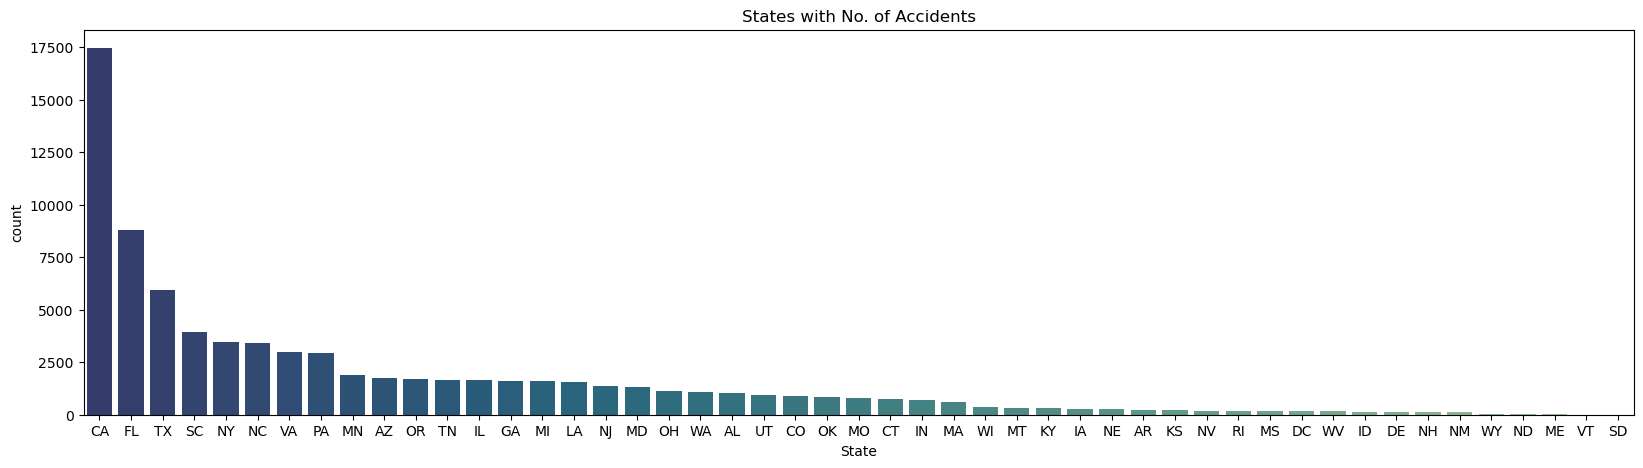

In [34]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.countplot(x = 'State', data = df, palette = "crest_r", order = df['State'].value_counts().index)
ax.set_title("States with No. of Accidents");

California (CA) is the 3rd most largest state of US after Texas (TX) and Alaska (AL)

Also California (CA) is the most populated among all, followed by Texas (TX)

Alaska (AL) is the largest state but least populated state at 48th rank

In [36]:
print("City Code: ", df.City.unique())
print("Total No. of Cities in Dataset: ", len(df.City.unique()))

City Code:  ['Bradenton' 'Elizabethport' 'East Lansing' ... 'Annawan' 'Clawson'
 'Edwardsburg']
Total No. of Cities in Dataset:  5996


Total No. of Cities in Dataset: 5996

There were 19,502 incorporated places registered in the United States

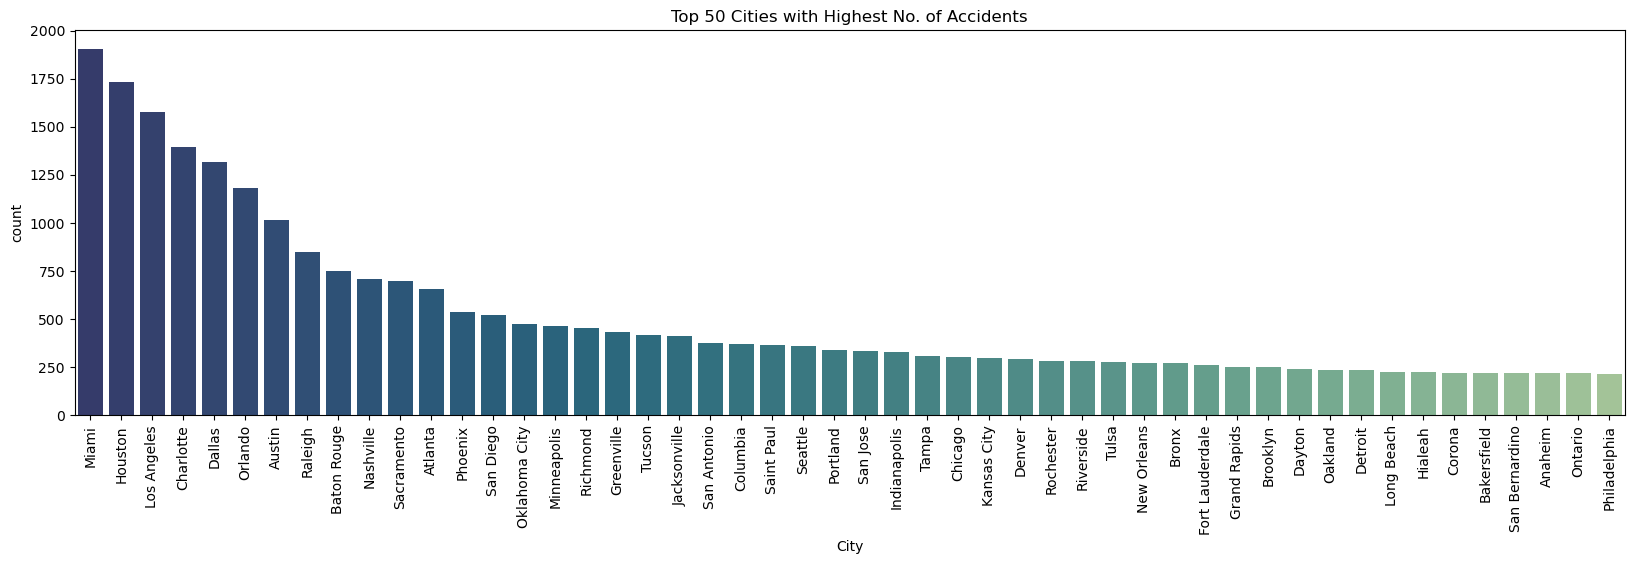

In [40]:
fig, ax = plt.subplots(figsize = (20,5))
ax = sns.countplot(x="City", data=df, order=df.City.value_counts().iloc[:50].index, orient = 'v', palette = "crest_r")
ax.set_title("Top 50 Cities with Highest No. of Accidents")
ax.set_xticklabels(c.get_xticklabels(), rotation=90)
plt.show()

#  Timestamp

In [42]:
df.Start_Time = pd.to_datetime(df.Start_Time)
df.Start_Time

139745    2016-08-31 08:38:47
3485460   2016-09-01 13:37:45
595046    2022-06-07 08:52:40
306942    2016-08-01 09:14:59
1191222   2021-01-08 15:22:40
                  ...        
5869999   2021-03-03 17:27:33
5696426   2021-03-21 10:37:00
6698122   2020-09-29 12:58:00
7685615   2019-06-07 21:10:30
7184421   2020-01-22 09:22:00
Name: Start_Time, Length: 77283, dtype: datetime64[ns]

In [43]:
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year
df['Hour'] = df['Start_Time'].dt.hour
df['Weekday'] = df['Start_Time'].dt.weekday
#yearly data subset 
data_2016 = df[df.Start_Time.dt.year == 2016]
data_2017 = df[df.Start_Time.dt.year == 2017]
data_2018 = df[df.Start_Time.dt.year == 2018]
data_2019 = df[df.Start_Time.dt.year == 2019]
data_2020 = df[df.Start_Time.dt.year == 2020]
data_2017_2019 = df[(df["Year"] >= 2017) & (df["Year"] <= 2019)]

# Yearly

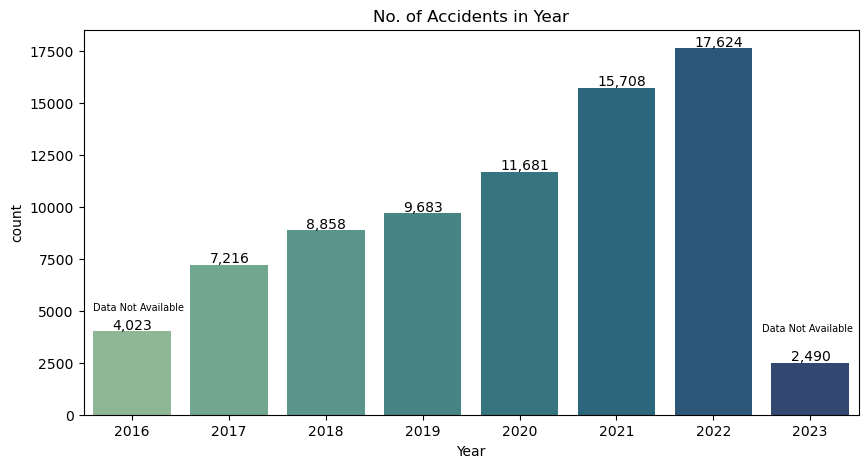

In [78]:
fig, ax = plt.subplots(figsize = (10,5))
ax = sns.countplot(x="Year", data=df, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(-0.4,5000), fontsize=7)
plt.annotate('Data Not Available',xy=(6.5,4000), fontsize=7)

ax.set_title("No. of Accidents in Year")
for i in ax.patches:
    count = '{:,.0f}'.format(i.get_height())
    x = i.get_x()+i.get_width()-0.60
    y = i.get_height()+100
    ax.annotate(count, (x, y))
plt.show()

# Monthly

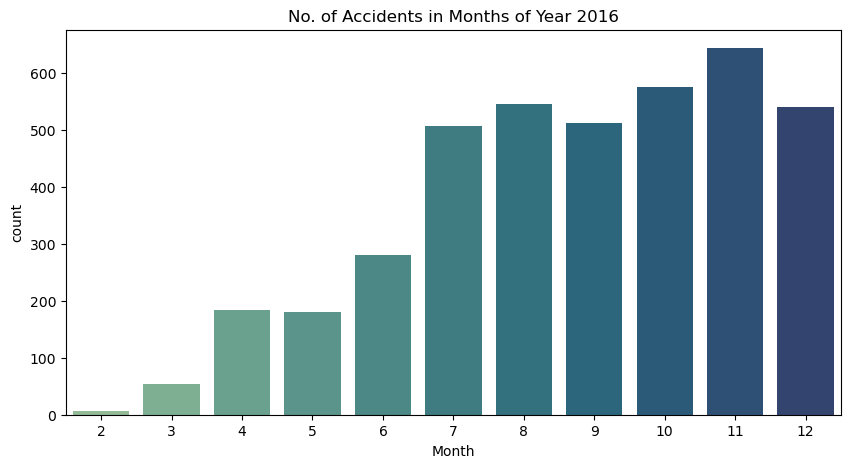

In [79]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(2,50000), fontsize=11)
c.set_title("No. of Accidents in Months of Year 2016")
plt.show()

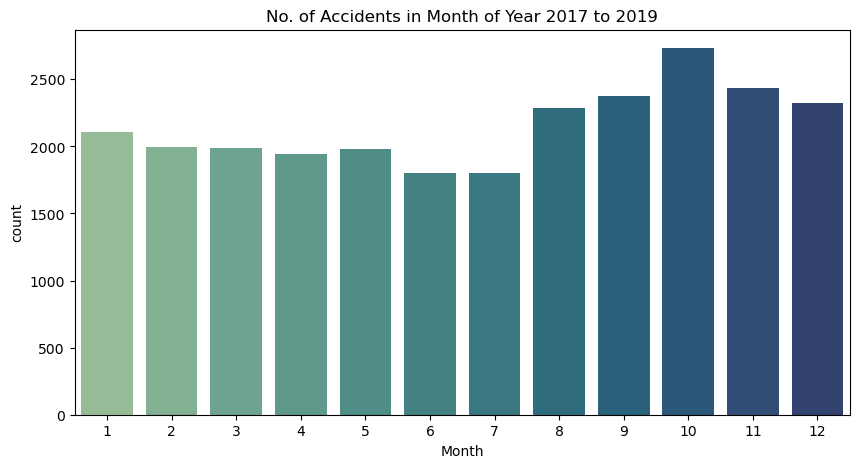

In [80]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2017 to 2019")
plt.show()


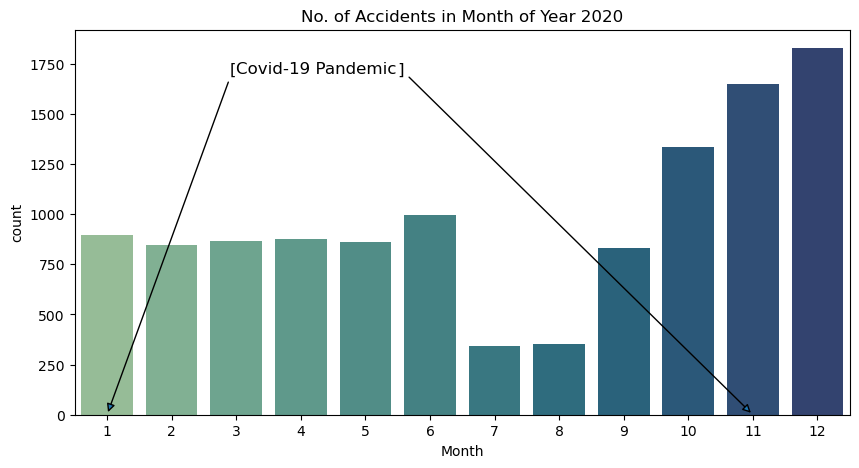

In [85]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Month", data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(2,1700), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(1.9,1700),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(10,0),xytext=(4.5,1700),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

# Weekly
All Weeks of Year 2016

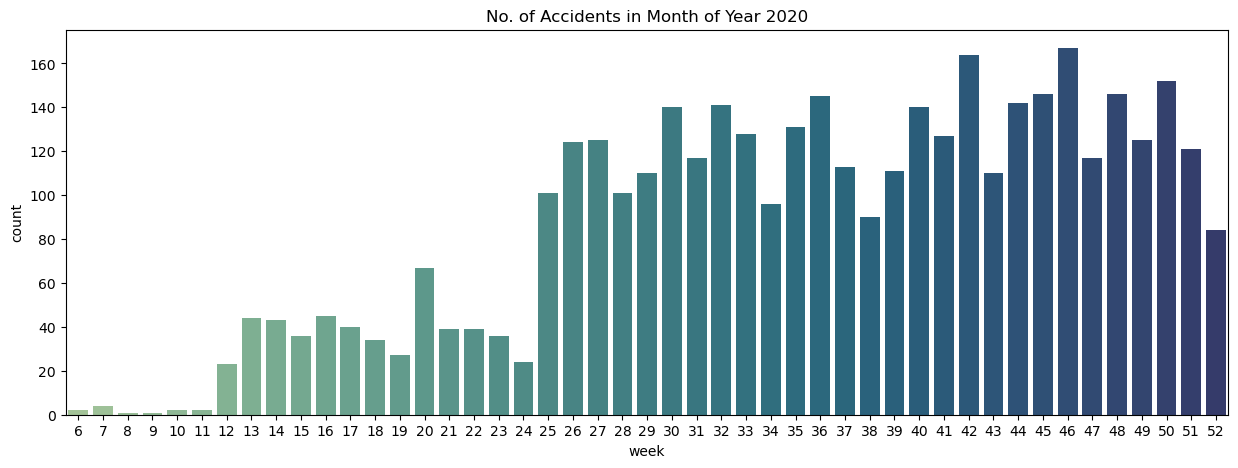

In [86]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2016.Start_Time.dt.isocalendar().week, data=data_2016, orient = 'v', palette = "crest")
plt.annotate('Data Not Available',xy=(5,6000), fontsize=11)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

All Weeks of Year 2017 to 2019

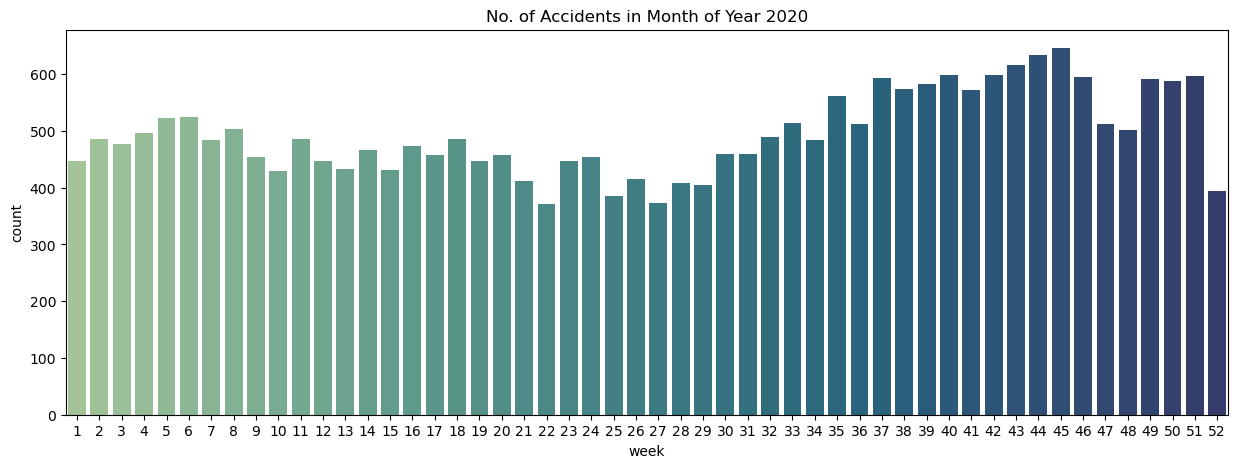

In [88]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2017_2019.Start_Time.dt.isocalendar().week, data=data_2017_2019, orient = 'v', palette = "crest")
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

All Weeks of Year 2020

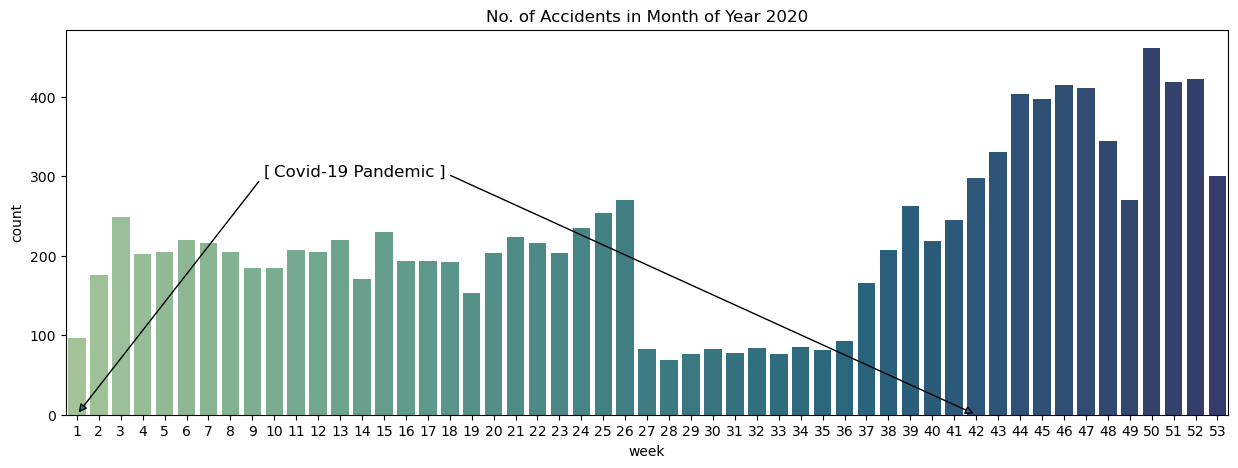

In [91]:
fig, ax = plt.subplots(figsize = (15,5))
c = sns.countplot(x=data_2020.Start_Time.dt.isocalendar().week, data=data_2020, orient = 'v', palette = "crest")
plt.annotate('Covid-19 Pandemic',xy=(9,300), fontsize=12)
plt.annotate("[",xy=(0,0),xytext=(8.5,300),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate("]",xy=(41,0),xytext=(16.5,300),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
c.set_title("No. of Accidents in Month of Year 2020")
plt.show()

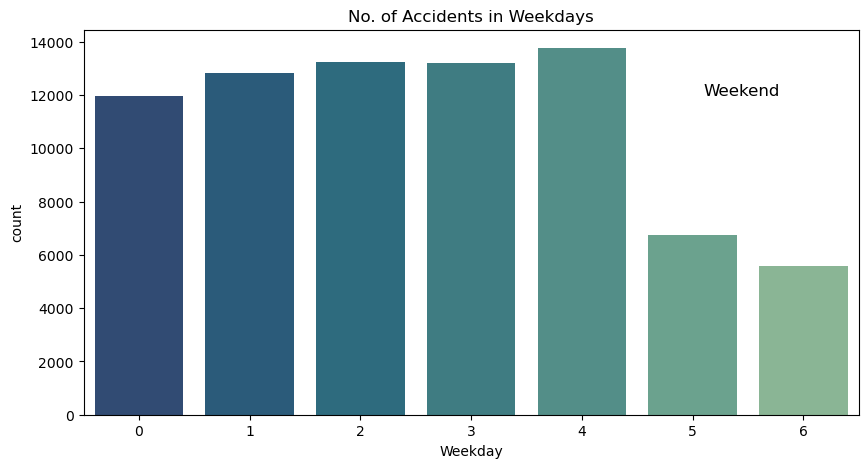

In [96]:
fig, ax = plt.subplots(figsize = (10,5))
c = sns.countplot(x="Weekday", data=df, orient = 'v', palette = "crest_r")
plt.annotate('Weekend',xy=(5.1,12000), fontsize=12)
c.set_title("No. of Accidents in Weekdays")
plt.show()

on Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays

sns.distplot(df.Start_Time.dt.hour, bins=24, kde=False, norm_hist=True)

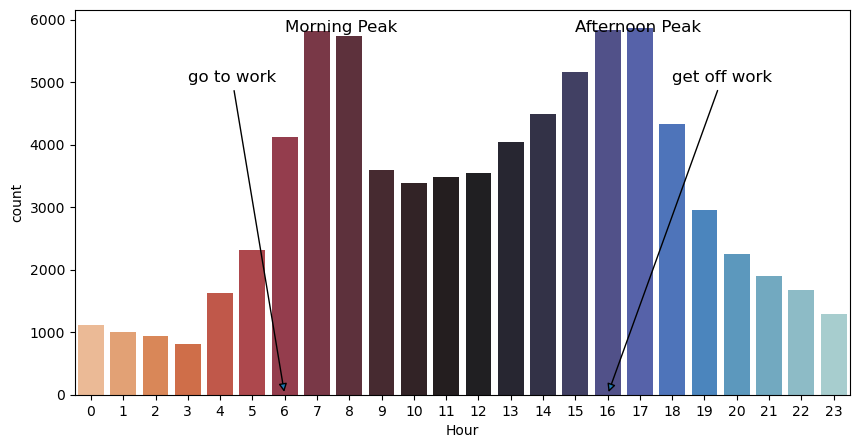

In [101]:
fig, ax = plt.subplots(figsize = (10,5))
sns.countplot(x="Hour", data=df, orient = 'v', palette = "icefire_r")
plt.annotate('Morning Peak',xy=(6,5800), fontsize=12)
plt.annotate('Afternoon Peak',xy=(15,5800), fontsize=12)
plt.annotate('go to work',xy=(6,0),xytext=(3,5000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.annotate('get off work',xy=(16,0),xytext=(18,5000),arrowprops={'arrowstyle':'-|>'}, fontsize=12)
plt.show()

139745     27.441093
3485460    40.645420
595046     42.760456
306942     29.719738
1191222    29.730717
             ...    
5869999    38.900195
5696426    41.793038
6698122    25.889368
7685615    41.769729
7184421    37.742190
Name: Start_Lat, Length: 77283, dtype: float64

139745     -82.459206
3485460    -74.203037
595046     -84.509201
306942     -95.301353
1191222    -95.413300
              ...    
5869999    -77.039448
5696426    -87.908010
6698122    -80.206795
7685615    -86.088430
7184421   -121.525634
Name: Start_Lng, Length: 77283, dtype: float64

In [ ]:
# sample_df = df.sample(int(0.1 * len(df)))
# sample_df

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

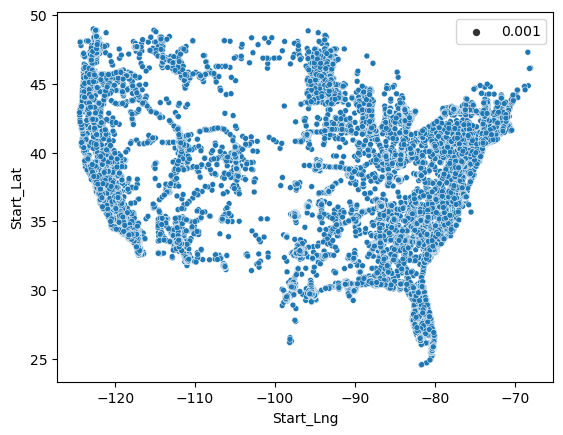

4237603    34.006151
2452628    29.521730
7488274    29.938970
7193376    34.018440
7106859    39.754640
             ...    
1759465    39.269970
4016395    32.820994
3207735    27.893717
6014738    32.906896
6099860    40.893929
Name: Start_Lat, Length: 100, dtype: float64
4237603   -118.061796
2452628    -98.476776
7488274    -95.352860
7193376   -118.280060
7106859   -105.236300
              ...    
1759465    -84.437469
4016395    -96.716499
3207735    -82.666122
6014738   -117.116135
6099860    -74.132064
Name: Start_Lng, Length: 100, dtype: float64


## Summary and Conclusion
Insights:

State of California recorded the largest number of accidents. But there were no data from New York

A high percentage of accidents occur between 6 am to 10 am (probably people in a hurry to get to work)

On Sundays, the peak occurs between 10 am and 3 pm, unlike weekdays. Next higest percentage is 3 pm to 6 pm.

Accidents are more on weekdays than the weekends

Among the months december has the maximum number of accidents followed by november.

Less than 5% of cities have more than 1000 yearly accidents.
